In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [8]:
warnings.filterwarnings('ignore')

In [9]:
# 数据读取

train_data = pd.read_csv('first_round_training_data.csv')
test_data = pd.read_csv('first_round_testing_data.csv')
submit = pd.read_csv('submit_example.csv')

In [10]:
print(train_data.info())
print(test_data.describe())
print(submit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
Parameter1       6000 non-null float64
Parameter2       6000 non-null float64
Parameter3       6000 non-null float64
Parameter4       6000 non-null float64
Parameter5       6000 non-null float64
Parameter6       6000 non-null float64
Parameter7       6000 non-null float64
Parameter8       6000 non-null float64
Parameter9       6000 non-null float64
Parameter10      6000 non-null float64
Attribute1       6000 non-null float64
Attribute2       6000 non-null float64
Attribute3       6000 non-null float64
Attribute4       6000 non-null float64
Attribute5       6000 non-null float64
Attribute6       6000 non-null float64
Attribute7       6000 non-null float64
Attribute8       6000 non-null float64
Attribute9       6000 non-null float64
Attribute10      6000 non-null float64
Quality_label    6000 non-null object
dtypes: float64(20), object(1)
memory usage: 984.5+ KB
None
           Grou

In [11]:
train_data.head()

# P10 = test_data.pop('Parameter10')
# test_data.insert(10,'Parameter10',P10)
test_data.head(100)
# submit.head()


,Group,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
0,0,0.235279,0.195680,0.351488,0.186814,8.645558e-02,1.434060,1.230409,0.038483,2.931083,2.005852
1,0,0.043799,0.523976,32.590688,0.886285,2.970249e+01,0.027434,0.016852,0.600827,0.118077,887.611257
2,0,21.466737,0.523976,11.847792,79499.554454,1.354461e+04,0.027434,0.016852,0.600827,0.118077,887.611257
3,0,0.703795,0.010192,0.018080,317.015599,3.808756e+01,0.428092,0.314162,0.038483,17.850021,0.051850
4,0,10.447960,0.010192,15.983891,0.996049,1.671569e+01,0.477823,0.464037,0.038483,17.850021,0.051850
5,0,733.439920,0.010192,99.698641,3.202776,3.136804e+01,0.477823,0.464037,0.038483,17.850021,0.051850
6,0,0.149962,0.010192,2.910066,2.187656,3.317446e+02,0.533331,0.464037,0.038483,17.850021,0.051850
7,0,0.060635,0.010192,0.016492,0.007373,7.183437e+03,0.533331,0.464037,0.038483,17.850021,0.051850
8,0,971.284623,0.010192,29.954312,3.639672,1.363832e-01,0.477823,0.381815,0.038483,17.850021,0.051850
9,0,1372.664549,0.010192,2.103451,0.531944,5.802723e+00,0.477823,0.464037,0.038483,17.850021,0.051850


In [12]:
# 对质量标签进行数值处理 Quality_label = {fail,pass,good,excellent}

dic = {'Excellent':'0','Good':'1','Pass':'2','Fail':'3'}
train_data['Quality_label'] = train_data['Quality_label'].map(dic)

In [13]:
# 缺失值检查
print(train_data.isnull().sum())

Parameter1       0
Parameter2       0
Parameter3       0
Parameter4       0
Parameter5       0
Parameter6       0
Parameter7       0
Parameter8       0
Parameter9       0
Parameter10      0
Attribute1       0
Attribute2       0
Attribute3       0
Attribute4       0
Attribute5       0
Attribute6       0
Attribute7       0
Attribute8       0
Attribute9       0
Attribute10      0
Quality_label    0
dtype: int64


In [14]:
# 缺失值结果说明无缺失值
# 解决matplotlib绘图中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['KaiTi']   # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号


['Parameter1', 'Parameter2', 'Parameter3', 'Parameter4', 'Parameter5', 'Parameter6', 'Parameter7', 'Parameter8', 'Parameter9', 'Parameter10', 'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Quality_label']


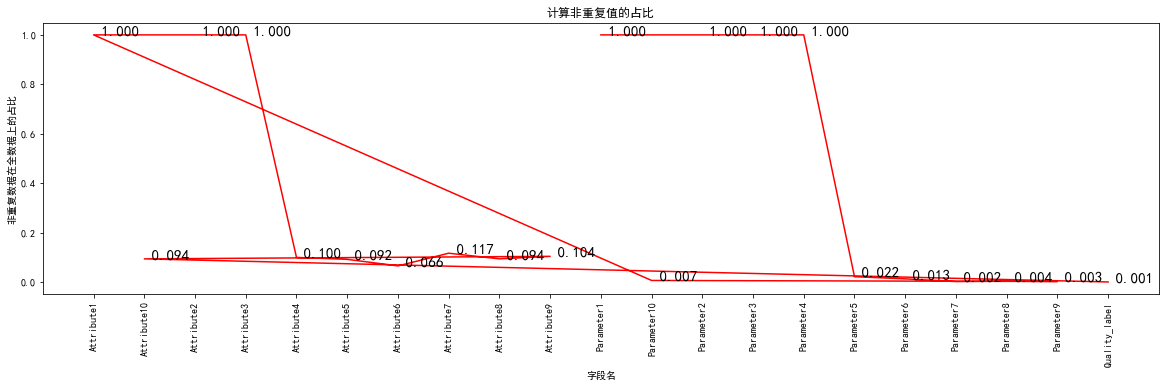

In [65]:
# 对数据进行连续型和离散型分析
col_name = train_data.columns.tolist()
print(col_name)
NotDigs_Count = []
for i in col_name:
    NotDigs = len(train_data[i].drop_duplicates())/6000
    NotDigs_Count.append(NotDigs)
# print(NotDigs_Count)
plt.figure(figsize=(20,5))

plt.plot(col_name,NotDigs_Count,c='r')
plt.title('计算非重复值的占比')
plt.xlabel('字段名')
plt.ylabel('非重复数据在全数据上的占比')
plt.xticks(rotation = 90)
for x,y in zip(col_name,NotDigs_Count):
    plt.text(x,y,'% .3f' % y,fontdict={'fontsize':15})
    
plt.show()

# print(col_name)

In [34]:
#测试集划分

X_train, X_test, y_train,y_test = train_test_split(
    train_data[train_data.columns[4:11]],train_data['Quality_label'],test_size=0.3, random_state=42)


In [54]:
# 选择参数

data = train_data.append(test_data)
feature_name = ['Parameter{0}'.format(i) for i in range(5,11)]
tr_index = ~data['Quality_label'].isnull() # 训练集数据
x_train = data[tr_index][feature_name].reset_index(drop = True)
y = data[tr_index]['Quality_label'].reset_index(drop=True).astype(int)
x_test = data[~tr_index][feature_name].reset_index(drop=True)
pred = np.zeros((x_test.shape[0],4))

In [70]:
def svc(X_train,X_test,y_train,y_test):
    model = SVC(probability=True)
    model.fit(X_train,y_train)
    predp = model.predict_proba(X_test) 
    pred = model.predict(X_test)
    print('log_loss',log_loss(pd.get_dummies(y_test).values, predp))
    print('svc_ac',accuracy_score(y_test, pred))
    print('--------------------------------')

    return model

In [71]:
def svc_then(X_train,X_test,y_train,y_test):
    
    # SVC 调参
    # 调参发现C调整结果反而降低，索性不对C进行调参
    # 初始参数
    # SVC(C=1.0,kernel='rbf',degree=3,gamma='scale')
    # params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 'auto'}
    # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}，gamma : {'scale', 'auto'}
    svc_then_params = { 'gamma': 'auto'}
    # params_then_grid = { 'gamma': 'auto'}

    # params_grid = { 'gamma': 'auto'}

    # param_grid = {'gamma' :['scale','auto']}

    # m  = GridSearchCV(SVC(),params_grid)
    # m.fit(X_train,y)
    # print("该参数下得到的最佳得分为：{}".format(m.best_score_))
    # print("最佳参数为：{}".format(m.best_params_))
    
    model =SVC(probability=True,**svc_then_params)
    model.fit(X_train,y_train)
#     oof = model.predict_proba(X_test)
    predp = model.predict_proba(X_test)
    pred = model.predict(X_test) 
    print('log_loss',log_loss(pd.get_dummies(y_test).values, predp))
    print('svc_then_ac',accuracy_score(y_test,pred))
    print('--------------------------------')

    return model

In [72]:
def byes(X_train,X_test,y_train,y_test):
#     model = naive_bayes.GaussianNB() # 高斯贝叶斯
#     model = naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    model = naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
    model.fit(X_train,y_train)
    predp = model.predict_proba(X_test)
    pred = model.predict(X_test)
    print('log_loss',log_loss(pd.get_dummies(y_test).values, predp))
    print('byes_ac',accuracy_score(y_test, pred))
    print('--------------------------------')

    return model

In [73]:
def GB_best_params(X_train,X_test,y_train,y_test):
    #GradientBoostingClassifier最优参数
    model1 = GradientBoostingClassifier()#实例化算法
    model2 = GridSearchCV(model1,param_grid={"learning_rate":[0.1,0.01,0.001],
                                             "n_estimators":[10,100,1000]},verbose=2)
    model2.fit(X_train,y_train)

    model2.best_params_ ##找到最好的参数
    # {'learning_rate': 0.1, 'n_estimators': 1000}
    predp = model2.predict_proba(X_test)
    pred = model2.predict(X_test)
    print("GridSearch最优参数：", model2.best_params_)
    print('log_loss',log_loss(pd.get_dummies(y_test).values, predp))
    print('GBclassifier_ac',accuracy_score(y_test, pred))
    print('--------------------------------')
    return model2

In [74]:
def GB_param(X_train,X_test,y_train,y_test):
    #GradientBoostingClassifier指定参数
    gdbt_then_params = {'learning_rate': 0.1, 'n_estimators': 52, 'min_samples_split':809, 'min_samples_leaf': 70, 'max_depth': 5,
                        'max_features':'sqrt', 'subsample': 0.8 }
    GB_model2 = GradientBoostingClassifier(**gdbt_then_params)
    GB_model2.fit(X_train,y_train)
    GB_predp = GB_model2.predict_proba(X_test)
    GB_pred = GB_model2.predict(X_test)
    print('log_loss',log_loss(pd.get_dummies(y_test).values, GB_predp))
    print('GBclassifier2_ac',accuracy_score(y_test, GB_pred))
    print('--------------------------------')
    return GB_model2

In [75]:
if __name__ == '__main__':
    svc_model = svc(X_train,X_test,y_train,y_test)
    svc_model2 = svc_then(X_train,X_test,y_train,y_test)
    byes_model = byes(X_train,X_test,y_train,y_test)
    gbdt_model = GB_best_params(X_train,X_test,y_train,y_test)
    gbdt_model2 = GB_param(X_train,X_test,y_train,y_test)
#     svc_then()
#     gdbt()
#     gdbt_then()
#     cbt()
#     cbt_then()
#     model_mix()

log_loss 1.2494640169593574
svc_ac 0.44277777777777777
--------------------------------
log_loss 1.249673061964404
svc_then_ac 0.44277777777777777
--------------------------------
log_loss 1.323633535728891
byes_ac 0.39
--------------------------------
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.7s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.7s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.7s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   8.1s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.5min finished


GridSearch最优参数： {'learning_rate': 0.1, 'n_estimators': 100}
log_loss 1.1098935913139951
GBclassifier_ac 0.52
--------------------------------
log_loss 1.1254195205129873
GBclassifier2_ac 0.5044444444444445
--------------------------------


In [56]:
svc = SVC(probability=True)
svc.fit(x_train,y)
svc_predp = svc.predict_proba(x_test)

svc_then_params = { 'gamma': 'auto'}
svc_then = SVC(probability=True,**svc_then_params)
svc.fit(x_train,y)
svc_then_predp = svc.predict_proba(x_test)
svc_then_pred = svc.predict(x_test)

In [58]:
gbdt_model = GradientBoostingClassifier()
gbdt_model2 = GridSearchCV(gbdt_model,param_grid={"learning_rate":[0.1,0.01,0.001],
                                         "n_estimators":[10,100,1000]},verbose=2)
model2.fit(x_train,y)
model2.best_params_ ##找到最好的参数
print("GridSearch最优参数：", model2.best_params_)
gbdt_predp = model2.predict_proba(x_test)
gbdt_pred = model2.predict(x_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.1, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.8s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.8s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.7s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   8.3s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   8.0s
[CV] learning_rate=0.01, n_estimators=10 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.5min finished


GridSearch最优参数： {'learning_rate': 0.01, 'n_estimators': 1000}


In [64]:
#输出结果

svc_sub = test_data[['Group']]
gbdt_sub = test_data[['Group']]
prob_cols = [i for i in submit.columns if i not in ['Group']]


for i,f in enumerate(prob_cols):
    svc_sub[f] = svc_predp[:,i]
    gbdt_sub[f] = gbdt_predp[:,i]

for i in prob_cols:
    svc_sub[i] = svc_sub.groupby('Group')[i].transform('mean')
    gbdt_sub[i] = gbdt_sub.groupby('Group')[i].transform('mean')
    
svc_sub = svc_sub.drop_duplicates()
gbdt_sub = gbdt_sub.drop_duplicates()
svc_sub.dropna(subset=prob_cols,inplace=True)
gbdt_sub.dropna(subset=prob_cols,inplace=True)
# print(sub)
svc_sub.to_csv('./svc_submission_mean.csv',index = None)
gbdt_sub.to_csv('./gbdt_submission_mean.csv',index = None)
